---
Group `Homework3 4`: 

**Michelle (Chia Chi) Ho, Jiejun Lu, Jiawen Tong**

---

# Homework 3

##### Data: Homework_3_Data.txt, housedata.zip

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, September 29th, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [1]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
import seaborn as sns
%matplotlib inline

from scipy.stats import norm

## Question 1: When have no confidence that you can lift yourself by the Bootstrap?

**Coding required**

The idea behind non-parametric bootstrapping is that sampling distributions constructed via the true data generating process should be very close to sampling distributions constructed by resampling.  We mentioned in lab that one edge cases for bootstrapping is calculating order statistics.  Let's explore this edgecase.

1.1. Suppose you have $\{X_1, X_2, ... X_n\}$ datapoints such that $X_i$ are independently and identically drawn from a $Unif(0, \theta)$.  Consider the extreme order statistic Y = $X_{(n)}$ = max($X_1, X_2, ... X_n$). Write an expression for the distribution $f_Y(Y|\theta)$.

1.2. Derive $\hat{\theta}$ the maximum likelihood estimate for $\theta$ given datapoints $\{X_1, X_2, ... X_n\}$.

1.3. To see an alternate potential estimator use the distribution you derived in 1.1. to find an expression for the unbiased estimate of  theta.

1.4. Use scipy/numpy to generate 100 samples {$X_i$} from Unif(0,1) (i.e. let $\theta$ = 1) and store them in the variable `original_xi_samples`.  Based on your data sample, what's the empirical estimate for $\theta$.

1.6. Use non-parametric bootstrap to generate a sampling distribution of 1000 estimates for theta.  Plot a histogram of your sampling distribution.  Make sure to title and label the plot.  

1.7. Is your histogram smooth?  From visual inspection does it seem like a good representation of a sampling distribution?

1.8. So far we've used a "natural" version of calculating bootstrap confidence intervals -- the percentile method.  In this situation is it possible for the "true" value of $\theta$ to be in the confidence interval?  In order to remedy this we'll use a alternate confidence interval version called the pivot confidence interval.  The pivot confidence interval is defined as [$2\hat{\theta} -\hat{\theta}^*_{(0.975)},2\hat{\theta} -\hat{\theta}^*_{(0.025)}$].  Is the true value contained in this interval?


---
**1.1 Answer**

The CDF of Y is:
$$F(y|\theta) = \int_{-\infty}^y f_Y(y|\theta) dy = P(Y \leq y) = P(\text{max}(X_{1:n}) \leq y)
= \left\{
    \begin{array}{ll}
        0 & y < 0\\
        {(\frac{y}{\theta})}^n & 0 \leq y \leq \theta\\
        1 & y > \theta
    \end{array}
   \right.
$$

Therefore, the PDF of Y would be:
$$\Rightarrow
f_Y(y|\theta) = \frac{\partial F_Y(y|\theta)}{\partial y}
= \left\{
    \begin{array}{ll}
        0 & y < 0\\
        \frac{n y^{n-1}}{\theta^n} & 0 \leq y \leq \theta\\
        0 & y > \theta
    \end{array}
   \right.
$$

---
**1.2 Answer**

Let max($X_{1:n}$) = m; we need to maximize the likelihood subject to $0 \leq m \leq \theta$: 
$$\text{Likelihood} = \prod_i^n P(X_i = x_i) = \prod_i^n P(X_i < \text{max}(X_{1:n})) = {(\frac{m}{\theta})}^n
$$

$$\log (\text{Likelihood}) = n\log m - n\log \theta$$

$$\frac{\partial \log (\text{Likelihood})}{\partial \theta} = -\frac{n}{\theta} < 0$$

Therefore, the log likelihood is decreasing for any $\theta > 0$ and the maximum likelihood is at $\theta$'s minimum such that $\theta \geq \text{max}(X_1, X_2, \ldots, X_n)$:

$$\hat{\theta}_{MLE} = \text{max}(X_1, X_2, \ldots, X_n) = Y$$


---
**1.3 Answer**

$$E[Y] = \int y f_Y(y|\theta) dy = \int_0^\theta y \frac{ny^{n-1}}{\theta^n} dy = \frac{n}{\theta^n} \int_0^\theta y^n dy = \frac{n}{n+1} \theta$$

$$\Rightarrow \theta = \frac{n+1}{n}E[Y]$$

Since $$E[\theta] = \frac{n+1}{n}E[Y] = \theta$$, this is an unbiased estimate for $\theta$.

---
**1.4 Answer**

In [2]:
# 1.4
np.random.seed(1)

theta = 1.
n_size = 100
original_xi_samples = np.random.uniform(0, theta, size=n_size)
theta_hat = max(original_xi_samples)
print('Empirical Estimate of theta = max(original_xi_samples):', theta_hat)

Empirical Estimate of theta = max(original_xi_samples): 0.9888610889064947


---
**1.6 Answer**

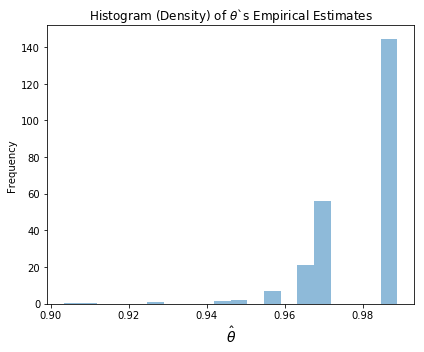

In [3]:
# 1.6
np.random.seed(1)

n_sim = 1000
theta_estimates = []
for i in range(n_sim):
    # extract the empirical theta on each bootstrapped sample
    theta_estimates.append(max(np.random.choice(original_xi_samples, size=n_size, replace=True)))

ax = pd.Series(theta_estimates, name='Empirical Estimate of theta').plot(kind='hist', density=True, bins=20,
                figsize=(6, 5), alpha=0.5, title=r'Histogram (Density) of $\theta$`s Empirical Estimates')
ax.set_xlabel(r'$\hat \theta$', fontsize=14)
plt.tight_layout()

---
**1.7 Answer**

The histogram is not smooth and thus does not seem like a good representation of the sampling distribution of $\theta$. The discontinuity is due to the non-parametric bootstrapping.

In [4]:
# 1.8 
r = np.percentile(theta_estimates, 97.5)
l = np.percentile(theta_estimates, 2.5)
print('--- Natural 95% CI ---')
print('left: {}, right: {}'.format(l, r))
print('True theta is in the natural CI:', (l<=theta) and (theta<=r))

l_new = 2*theta_hat - r
r_new = 2*theta_hat - l
print('\n--- Modified 95% CI ---')
print('left: {}, right: {}'.format(l_new, r_new))
print('True theta is in the modified CI:', (l_new<=theta) and (theta<=r_new))

--- Natural 95% CI ---
left: 0.9578895301505019, right: 0.9888610889064947
True theta is in the natural CI: False

--- Modified 95% CI ---
left: 0.9888610889064947, right: 1.0198326476624875
True theta is in the modified CI: True


**1.8 Answer**

As shown above, the true $\theta$ is not contanined in the natural CI but is contained in the modified one.

---
## Question 2: Visualize Your Poor Marginlized Conditional Love

**Coding required**

Read the data set contained in [data/Homework_3_Data.txt](data/Homework_3_Data.txt). Each data point is a two-dimensional vector, $\mathbf{x} = (x_1, x_2)$.

2.1. Make a 2-D visualization of the empirical distribution of the data. 

2.2. We assume that the data was generated by some probability distribution (pdf).  Visualize that pdf, $f_X$.

2.3. Visualize the conditional distribution defined by $f_{x_2 \mid x_1}$ for $x_1 \in [3.99, 4.01]$.

2.4. Visualize the mariginal distribution defined by $f_{x_1}$.

---
**2.1~2.4 Answer**

In [5]:
# read in the data
data = pd.read_table('data/Homework_3_Data.txt', sep=',', header=None)
data.rename(columns={0:'x1', 1:'x2'}, inplace=True)
print(data.shape)
data.head()

(10000, 2)


,x1,x2
0,3.008992,6.205285
1,4.845897,4.864804
2,5.137567,4.536671
3,4.766038,4.158884
4,4.242169,4.070555


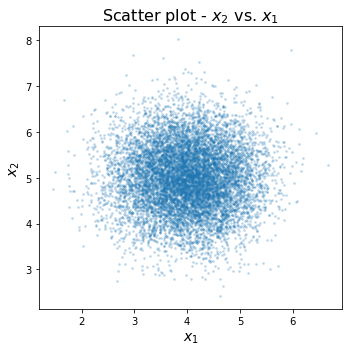

In [6]:
# 2D scatter plot of the data
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x=data['x1'], y=data['x2'], alpha=0.2, s=3)

ax.set_title(r'Scatter plot - $x_2$ vs. $x_1$', fontsize=16)
ax.set_ylabel(r'$x_2$', fontsize=14)
ax.set_xlabel(r'$x_1$', fontsize=14)
plt.tight_layout()

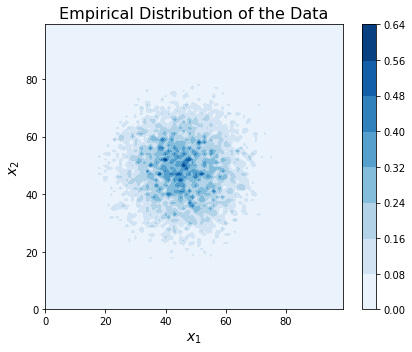

In [7]:
# 2.1 Visualize the empirical distribution of the 2D data in Contourf Plot
H, _, _ = np.histogram2d(x=data['x1'], y=data['x2'], bins=100, normed=True)
plt.subplots(figsize=(6, 5))
plt.contourf(H, cmap='Blues')
plt.colorbar()
plt.title('Empirical Distribution of the Data', fontsize=16)
plt.xlabel(r'$x_1$', fontsize=14)
plt.ylabel(r'$x_2$', fontsize=14)
plt.tight_layout()

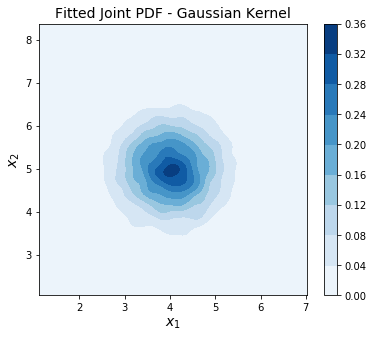

In [8]:
# 2.2 Visualize the fitted 2D joint pdf
plt.subplots(1, 1, figsize=(6, 5))
sns.kdeplot(data['x1'], data['x2'], shade=True, kernel='gau', cmap='Blues', cbar=True)
plt.title('Fitted Joint PDF - Gaussian Kernel', fontsize=14)
plt.xlabel(r'$x_1$', fontsize=14)
plt.ylabel(r'$x_2$', fontsize=14)
plt.show()

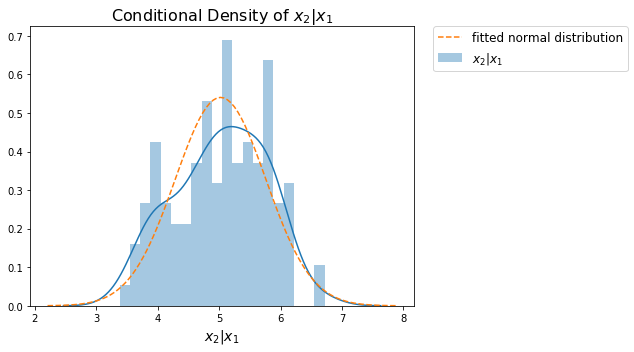

In [9]:
# 2.3 Visualize the conditional distribution defined by  f_{x2∣x1} for x1 in [3.99,4.01]
plt.subplots(1, 1, figsize=(6, 5))
sns.distplot(data[(data['x1']>=3.99) & (data['x1']<=4.01)]['x2'], bins=20, hist=True, kde=True, label=r'$x_2|x_1$')

# fit a normal distribution to 'Ash'
mu, std = norm.fit(data[(data['x1']>=3.99) & (data['x1']<=4.01)]['x2'].values)
# plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_drop = norm.pdf(x, mu, std)
plt.plot(x, p_drop, '--', label='fitted normal distribution')

plt.title(r'Conditional Density of $x_2|x_1$', fontsize=16)
plt.xlabel(r'$x_2|x_1$', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.tight_layout()

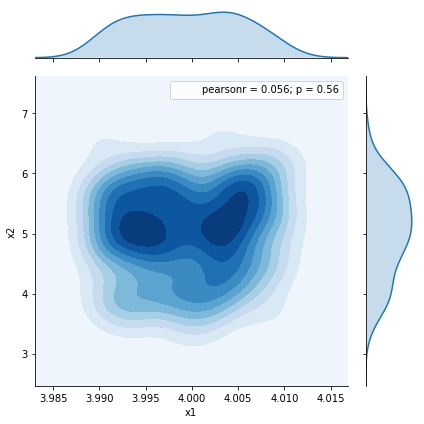

In [10]:
# 2.3 Visualize the conditional distribution defined by  f_{x2∣x1} for x1 in [3.99,4.01]
# if we do not take x1 as constant
sns.jointplot('x1', 'x2', data=data[(data['x1']>=3.99) & (data['x1']<=4.01)], kind='kde', cmap='Blues')
plt.tight_layout()

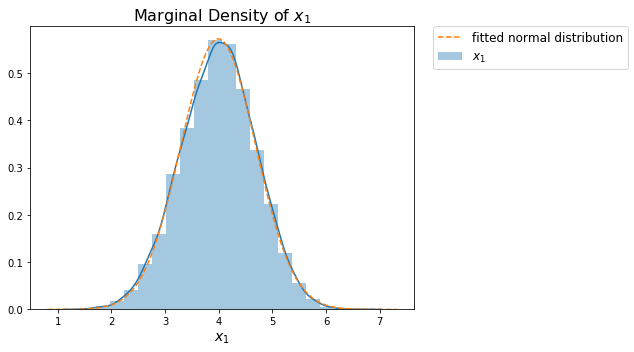

In [11]:
# 2.4 Visualize x1's mariginal distribution f_{x1}
plt.subplots(1, 1, figsize=(6, 5))
sns.distplot(data['x1'], bins=20, label=r'$x_1$')

# fit a normal distribution
mu, std = norm.fit(data['x1'].values)
# plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_drop = norm.pdf(x, mu, std)
plt.plot(x, p_drop, '--', label='fitted normal distribution')

plt.title(r'Marginal Density of $x_1$', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.xlabel(r'$x_1$', fontsize=14)
plt.tight_layout()

---
2.5. Empirically estimate the mean of the distribution $f_{x_1}$. Estimate, also the SE (standard error) of the estimate.

2.6. Empirically estimate the standard deviation of the distribution $f_{x_2 \mid x_1}$, for $x_1 \in [3.99, 4.01]$. Estimate, also the SE (standard error) of the estimate.

2.7. Given the SE, How many digits in your standard deviation estimate are significant? Explain why.

In obtaining estimates for this problem we want you to 

- define a function called *get_bootstrap_sample(dataset)* to generate each bootstrap sample
- and then another function *perform_bootstrap(dataset)* to generate all the samples. 

They should both take as parameters the dataset from which you'll be drawing samples. *perform_bootstrap* should call *get_bootstrap_sample* and return a sequence of bootstrap samples.  *get_bootstrap_sample* should return an individual bootstrap sample.

---
**2.5~2.7 Answer**

In [12]:
def get_bootstrap_sample(dataset):
    return np.random.choice(dataset, size=len(dataset), replace=True)

def perform_bootstrap(dataset, n_sim=1000):
    all_samples = []
    for i in range(n_sim):
        all_samples.append(get_bootstrap_sample(dataset))
    return all_samples
    

In [13]:
# 2.5 Empirically estimate the mean of f_{x1}. Estimate, also the SE (standard error) of the estimate.
np.random.seed(1)

sample_x1 = perform_bootstrap(data['x1'].values)
x1_sample_mean_estimates = np.mean(sample_x1, axis=1)
print('The mean of f_{x1}\'s mean estimates is:', np.mean(x1_sample_mean_estimates))
print('with standard error:', np.std(x1_sample_mean_estimates))

The mean of f_{x1}'s mean estimates is: 3.9927692743164243
with standard error: 0.006865925559635069


In [14]:
# 2.6 Empirically estimate the std of f_{x2|x1}, for x1 in [3.99, 4.01]
# Estimate, also the SE (standard error) of the estimate.
data_subset = data[(data['x1']>=3.99)&(data['x1']<=4.01)].reset_index(drop=True)

# generate bootstrapped samples where x1 is in [3.99, 4.01]
np.random.seed(1)
sample_x2_given_x1 = perform_bootstrap(data[(data['x1']>=3.99)&(data['x1']<=4.01)]['x2'].values)
x2_given_x1_std_estimates = np.std(sample_x2_given_x1, axis=1)
print('The mean of f_{x2|x1}\'s std estimates is:', np.mean(x2_given_x1_std_estimates))
print('with standard error:', np.std(x2_given_x1_std_estimates))

The mean of f_{x2|x1}'s std estimates is: 0.7329488865102515
with standard error: 0.03895510137143677


**2.7 Answer**


The standard deviation estimate of conditional pdf $f_{x_2|x_1} \approx 0.733$ with a SE=0.03+. This suggests that the last digit worth reporting in the estimate is the second decimal place as it is the first digit to encapsulate the error. Therefore, the estimate has 2 significant digits. 

Similarly, the mean estimate of marginal pdf $f_{x_1} \approx 3.993$ with a SE=0.006+. This suggests that the last digit worth reporting in the estimate is the third decimal place. Therefore, the esimate has 4 significant digits.

---

<div class="answer-separator">
------------------------
</div>

## Problem 3: Linear Regression

Consider the following base Regression class, which roughly follows the API in the python package `scikit-learn`.

Our model is the the multivariate linear model whose MLE solution or equivalent cost minimization was talked about in lecture:

$$y = X\beta + \epsilon$$
where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix created by stacking the features for each data point, and $\beta$ is a $p$ length vector of coefficients.

The class showcases the API:

$fit(X, y)$: Fits linear model to $X$ and $y$.

$get\_params()$: Returns $\hat{\beta}$ for the fitted model. The parameters should be stored in a dictionary with keys "intercept" and "coef" that give us $\hat{\beta_0}$ and $\hat{\beta_{1:}}$. (The second value here is thus a numpy array of coefficient values)

$predict(X)$: Predict new values with the fitted model given $X$.

$score(X, y)$: Returns $R^2$ value of the fitted model.

$set\_params()$: Manually set the parameters of the linear model.



In [15]:
class Regression(object):
    
    def __init__(self):
        self.params = dict()
    
    def get_params(self, k):
        return self.params[k]
    
    def set_params(self, **kwargs):
        for k,v in kwargs.items():
            self.params[k] = v
        
    def fit(self, X, y):
        raise NotImplementedError()
        
    def predict(self, X):
        raise NotImplementedError()
        
    def score(self, X, y):
        raise NotImplementedError()

3.1. In a jupyter notebook code cell below we've defined and implemented the class `Regression`.  Inherit from this class to create an ordinary least squares Linear Regression class called AM207OLS.  Your class will implement an sklearn-like api.  It's signature will look like this:

`class OLS(Regression):`

Implement `fit`, `predict` and `score`. This will involve some linear algebra. (You might want to read up on pseudo-inverses before you directly implement the linear algebra on the lecure slides).

The $R^2$ score is defined as: $${R^{2} = {1-{SS_E \over SS_T}}}$$

Where:

$$SS_T=\sum_i (y_i-\bar{y})^2, SS_R=\sum_i (\hat{y_i}-\bar{y})^2, SS_E=\sum_i (y_i - \hat{y_i})^2$$
where  ${y_i}$ are the original data values, $\hat{y_i}$ are the predicted values, and $\bar{y_i}$ is the mean of the original data values.

---
**3.1 Answer - Codes**

In [16]:
class OLS(Regression):
    def __init__(self):
        self.params = dict()
        
    def get_params(self, k):
        if k not in self.params.keys():
            raise Exception('The OLS model must be fitted before calling get_params.') 
        return super(OLS, self).get_params(k)
        
    def fit(self, X, y):
        # add constant terms
        ones_col = np.ones((X.shape[0], 1))
        X_ones = np.concatenate((ones_col, X), axis=1)
        
        # calculate betas
        betas = np.dot(np.linalg.inv(np.dot(X_ones.T, X_ones)), np.dot(X_ones.T, y))
        
        # save the fitted intercept and coefficients to the params dictionary
        self.params['intercept'] = betas[0]
        self.params['coef'] = betas[1:]
        
        # save the training R2 score
        self.rsquared = self.score(X, y)

    
    def predict(self, X):
        # add constant terms
        ones_col = np.ones((X.shape[0], 1))
        X_ones = np.concatenate((ones_col, X), axis=1)
        
        # extract betas from self.params dictionary
        betas = np.zeros((X_ones.shape[1],))
        betas[0] = self.params['intercept']
        betas[1:] = self.params['coef']
        
        # calculate and return predictions
        return np.dot(X_ones, betas)
    
    def score(self, X, y):
        # predict with X 
        yhat = self.predict(X)  
        # calculate SSE
        SSE = np.sum(np.square(y - yhat))
        # calculate SST
        ybar = np.mean(y)
        SST = np.sum(np.square(y - ybar))
        # calculate and return rsqaured
        return 1 - (SSE/SST)

3.2.  We'll create a synthetic data set using the code below. (Read the documentation for `make_regression` to see what is going on).  

Verify that your code recovers these coefficients approximately on doing the fit. Plot the predicted `y` against the actual `y`. Also calculate the score using the same sets `X` and `y`. The usage will look something like:

```python
lr = OLS()
lr.fit(X,y)
lr.get_params['coef']
lr.predict(X,y)
lr.score(X,y)```

In [17]:
from sklearn.datasets import make_regression
import numpy as np
np.random.seed(99)
X, y, coef = make_regression(n_samples=30, n_features=10, n_informative=10, bias=1, noise=2, coef=True)
coef

array([76.6568183 , 77.67682678, 63.78807738, 19.3299907 , 59.01638708,
       53.13633737, 28.77629958, 10.01888939,  9.25346811, 59.55220395])

---
**3.2 Answer - Codes**

In [18]:
# 3.2
lr = OLS()
lr.fit(X,y)
print("fitted intercept: ", lr.get_params('intercept'))
print("fitted coeffs: ", lr.get_params('coef'))
print("==============================")
print("predictions: ", lr.predict(X))
print("==============================")
print("score: ", lr.score(X,y))

fitted intercept:  1.3458035707838505
fitted coeffs:  [77.20719705 76.51004831 62.97865316 18.4436452  58.50019885 53.25126559
 28.29088241  9.33333359 10.29584457 59.1606719 ]
predictions:  [  48.57564537   24.85508406  246.39920911   64.72282184  124.00042911
 -266.57653702  118.15510334 -108.57077603  191.15229644  174.74404249
 -103.59066227  -59.1576374   -54.70947468   73.91003582  505.22781806
   39.53820436 -191.02175593 -201.71787963   46.1500923  -111.90307749
  117.38777883 -111.52335297   41.66543625  168.33074858   73.41934029
  -80.64319083  155.12182695  -94.18157131  -48.17239883   40.78548557]
score:  0.9999155832062194


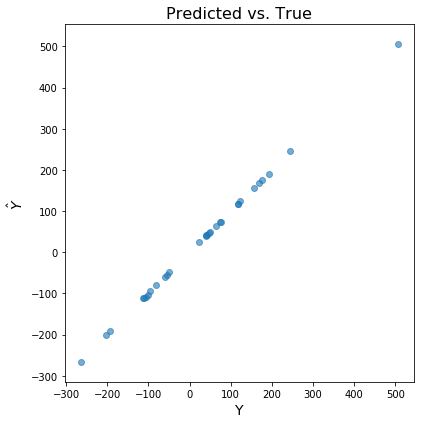

In [19]:
# plot predicted y against actual y
plt.figure(figsize=(6, 6))
plt.scatter(x=y, y=lr.predict(X), alpha=0.6)

plt.title('Predicted vs. True', fontsize=16)
plt.ylabel(r'$\hat Y$', fontsize=14)
plt.xlabel(r'Y', fontsize=14)
plt.axis('equal')
plt.tight_layout()

<div class="answer-separator">
------------------------
</div>

## Question 4: Is the Incumbent of the House in?

We shall consider US House data from 1896 to 1990. This dataset was compiled for [Gelman, Andrew, and Gary King. "Estimating incumbency advantage without bias." American Journal of Political Science (1990): 1142-1164.](http://gking.harvard.edu/files/gking/files/inc.pdf). Why incumbency and why the house? The house gives us lots of races in any given year to validate our model, and in elections which happen every two years, where demography hasn't changed much, incumbency is a large effect, as might be the presence of a national swing (which we would capture in an intercept in a regression).

Let us, then, imagine a very simplified model in which the democratic party's fraction of the vote in this election, for seat(county) $i$, at time $t$ years, $d_{i,t}$, is a linear combination of the democratic party's fraction of the vote in the previous election, at time $t-2$, $d_{i, t-2}$, and a categorical variable $I_{i,t}$, which characterizes the nature of the candidate running in this election:

$$
I =
\begin{cases} 
      -1 & \texttt{Republican Incumbent Running} \\
       0 & \texttt{New Candidate Running} \\
       1 & \texttt{Democratic Incumbent Running}
\end{cases}
$$

We use the statsmodels formula notation: 

`DP1 ~ DP + I`.

This means linear regress DP, the democratic fraction of the vote this time around for a given house seat on DP1 which is the democratic fraction the previous time around and I, a "factor" or categorical(nominal) variable with 3 levels.

In mathematical notation this regression is:

$$d_{t,i} = \beta_1 d_{i, t-2} + \beta_2 I_{i,t} + \beta_0,$$

where $d_{i, t-2}$ is the democratic fraction in county $i$ at the previous election, and $I_{i,t}$ is the factor above which tells us if (and from which party: 1 for dems, -1 for reps) an incumbent is running. We want to find $\beta_0,\beta_1,\beta_2$.

Notice that we are regressing on a discrete variable `I`. This incumbency factor takes values 1, -1, or 0. As such it only changes the *intercept* of the regression. You can think of it as 3 regression lines, one for each subpopulation of incumbency, with their *slope constrained to be the same*. An intercept of $\beta_0$ for open seats, $\beta_2+\beta_0$ for Democratic incumbents and $-\beta_2+\beta_0$ for Republican incumbents.

You then think a little bit more and realize that, for example, in many conservative districts you will have a republican elected whether he/she is an incumbent or not. And you now realize that our analysis does not consider the party of the incumbent. So you decide to fix this

Lets define $P_{t,i}$ as the party in power right now before the election at time $t$, i.e. the party that won the election at time $t-2$ in county $i$. It takes on values:

$$
P =
\begin{cases} 
      -1 & \texttt{Republican Seat holder} \\
       1 & \texttt{Democratic Seat holder}
\end{cases}
$$
We can do this regression instead:

`DP1 ~ DP + I + P`, where

$P$ represents the incumbent party, i.e. the party which won the election in year t−2.

In mathematical notation we have:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_2 I_{t,i} + \beta_3 P_{t,i} + \beta_0 ,$$
where $P_{t,i}$ is the party in power right now before the election at time $t$, i.e. the party that won the election at time $t-2$ in county $i$. The value of $P$ is 1 for democrats, and -1 for republicans.

### Interpretable Regressions

One can say that the coefficient of $I$ now more properly captures the ￼effect of incumbency, after controlling for party.

Regression coefficients become harder to interpret with multiple features. The meaning of any given coefficient depends on the other features in the model. Gelman and Hill advise: Typical advice is to interpret each coefficient “with all the other predictors held constant.”[Gelman, Andrew; Hill, Jennifer (2006-12-25). Data Analysis Using Regression and Multilevel/Hierarchical Models] Economists like to use the phrase "ceteris paribus" to describe this.

The way to do this is interpretation to look at the various cases and explain what the co-efficients of $P$ and $I$ mean. Let us at first set $I$ to 0 meaning no incumbents and explain what the coefficients of $P$ mean. We are then fitting:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_3 P_{t,i} + \beta_0 ,$$
which for the $P=1$ (Democrat party winning the past election) case, gives us:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_3 + \beta_0 ,$$
and, for the $P=-1$ (Republican party winning the past election) case, gives us:

$$d_{t,i} = \beta_1 d_{t-2,i} - \beta_3 + \beta_0 .$$
You can see that $\beta_3$ then captures half the difference in the effect between democrats and republicans that comes from just having the party incumbent. It tells us that, with respect to the national swing measure $\beta_0$, whats the party effect for republicans and democrats. It does it very poorly by splitting the difference between the democratic and republican party effects and being constant across seats, but its a start.




In [20]:
pairs=[
    (1898,1896),
    (1900,1898),
    (1904,1902),
    (1906,1904),
    (1908, 1906),
    (1910, 1908),
    (1914, 1912),
    (1916, 1914),
    (1918, 1916),
    (1920, 1918),
    (1924, 1922),
    (1926, 1924),
    (1928, 1926),
    (1930, 1928),
    (1934, 1932),
    (1936, 1934),
    (1938, 1936),
    (1940, 1938),
    (1944, 1942),
    (1946, 1944),
    (1948, 1946),
    (1950, 1948),
    (1954, 1952),
    (1956, 1954),
    (1958, 1956),
    (1960, 1958),
    (1964, 1962),
    (1966, 1964),
    (1968, 1966),
    (1970, 1968),
    (1974, 1972),
    (1976, 1974),
    (1978, 1976),
    (1980, 1978),
    (1984, 1982),
    (1986, 1984),
    (1988, 1986),
    (1990, 1988)
]

Each CSV file has the following information:

- a number for the state
- a number for the district
- D1 and R1, the dem and repub percentages in the past election, and I1 the incumbency back then
- D and R, the dem and repub percentages in the present election, and I the incumbency now
- P, the incumbent party from the past election in that seat, 1 for democrats, -1 for republicans
- PNOW, the party which won the current election, 1 for democrats, -1 for republicans
- A variable we'll call $T$ (for treatment),where we want to decide if we should replace an incumbent for a new candidate, or not. 
$$
T =
\begin{cases} 
      0 & \texttt{Incumbent Running} \\
      1 & \texttt{New Candidate Running}
\end{cases}
$$

(This column is not used in this homework)

In [21]:
pairframes={}
for p in pairs:
    key = str(p[0])+"-"+str(p[1])
    pairframes[key] = pd.read_csv('data/housedata/{}.csv'.format(key))

To get warmed up, let us consider the 1988-1990 election pair.

In [22]:
pairframes['1990-1988'].head()

,state,district,I,D,R,D1,R1,DP,DP1,P,PNOW,T
0,1,1,1,126566,50690,176463,51985,0.714029,0.772443,1,1,0.0
1,1,2,1,105085,70922,143326,81965,0.597050,0.636182,1,1,0.0
2,1,3,0,90772,83440,147394,74275,0.521043,0.664928,1,1,1.0
3,1,4,-1,32352,105682,55751,147843,0.234377,0.273834,-1,-1,0.0
4,1,5,0,85803,93912,58612,163729,0.477439,0.263613,-1,-1,1.0


To carry out the linear regression we'll use `statsmodels` from python, using the `ols`, or Ordinary Least Squares method defined there.

We use the `statsmodels` formula notation. `DP ~ DP1 + I` means linear regress `DP`, the democratic fraction of the vote this time around for a given house seat on `DP1` which is the democratic fraction the previous time around and `I`, a "factor" or categorical(nominal) variable with 3 levels: 

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [24]:
ols_model = ols('DP ~ DP1 + I', pairframes['1990-1988']).fit()
ols_model

In [25]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DP   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     612.0
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          1.04e-105
Time:                        19:20:50   Log-Likelihood:                 368.81
No. Observations:                 298   AIC:                            -731.6
Df Residuals:                     295   BIC:                            -720.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2326      0.020     11.503      0.000       0.193       0.272
DP1            0.5622      0.040     14.220      0.000       0.484       0.640
I              0.0429      0.008      5.333      0.000       0.027       0.059
==============================================================================
Omnibus:                        7.465   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.316
Skew:                           0.374   Prob(JB):                       0.0258
Kurtosis:                       3.174   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretable Regressions

One can say that **The coefficient of `I` now more properly captures the ￼effect of incumbency, after controlling for party.**

Regression coefficients become harder to interpret with multiple features. The meaning of any given coefficient depends on the other features in the model. Gelman and Hill advise: **Typical advice is to interpret each coefficient “with all the other predictors held constant.”**[Gelman, Andrew; Hill, Jennifer (2006-12-25). Data Analysis Using Regression and Multilevel/Hierarchical Models] Economists like to use the phrase "ceteris paribus" to describe this.

The way to do this is interpretation to look at the various cases and explain what the co-efficients of `P` and `I` mean. Let us at first set `I` to 0 meaning no incumbents and explain what the coefficients of `P` mean. 
We are then fitting:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_3 P_{t,i} + \beta_0 ,$$

which for the $P=1$ (Democrat party winning the past election) case, gives us:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_3 + \beta_0 ,$$

and, for the $P=-1$ (Republican party winning the past election) case, gives us:

$$d_{t,i} = \beta_1 d_{t-2,i} - \beta_3 + \beta_0 .$$

You can see that $\beta_3$ then captures half the difference in the effect between democrats and republicans that comes from just having the party incumbent. It tells us that, with respect to the national swing measure $\beta_0$, whats the party effect for republicans and democrats. It does it very poorly by splitting the difference between the democratic and republican party effects and being constant across seats, but its a start.



### 4.1 Explain the coefficient of Incumbency

**Use a similar argument to the one above**. 

(Note that setting $I$ to 1 also constrains $P$ to 1, but the reverse is not true as we saw above).

---
**4.1 Answer**

When we are fitting: $d_{t,i} = \beta_1 d_{t-2,i} + \beta_2 I_{t,i} + \beta_3 P_{t,i} + \beta_0$,

> - $I=-1$, the incumbency also constraints $P=-1$:
>> $d_{t,i} = \beta_1 d_{t-2,i} - \beta_2 - \beta_3 + \beta_0$

> - $I=1$, the incumbency also constraints $P=1$:
>> $d_{t,i} = \beta_1 d_{t-2,i} + \beta_2 + \beta_3 + \beta_0$

> - $I=0$, when incumbency does not have constraint on $P$:
>> - $P=-1$: 
>>> $d_{t,i} = \beta_1 d_{t-2,i} - \beta_3 + \beta_0$
>> - $P=1$: 
>>> $d_{t,i} = \beta_1 d_{t-2,i} + \beta_3 + \beta_0$


Therefore, the coefficient of $I$, $\beta_2$, captures the ￼effect of incumbency, after controlling for the effect of party which is captured by the coefficient of $P$, $\beta_3$. 

---

### 4.2 Carry out the linear regression `DP ~ DP1 + I + P` for all the year pairs

**Present the results in a dataframe `ols_frame`. Comment on the trend in the incumbency coefficients after 1960.**

(FORMAT: This dataframe has columns `yp`, the year-pair string (the keys of the dictionary of frames), the year for which we do the regression `year` (the higher year in the pair), the `formula`, which is just repeated, and the R-squared in `R2` for each regression, as well as the parameters of the regression and the p-values for the regression (for the name of the column here prefix the parameter with `p_` to denote the p-value).)

---
**4.2 Answer - Codes**

In [26]:
fm = 'DP ~ DP1 + I + P'
ols_result_dict_list = []
for yp_key, yp_df in pairframes.items():
    result_dict = {}
    
    # fit OLS
    yp_ols = ols(fm, yp_df).fit()
    
    # store OLS results
    result_dict['yp'] = yp_key
    result_dict['year'] = int(yp_key.split('-')[0])
    result_dict['formula'] = fm
    result_dict['R2'] = yp_ols.rsquared
    result_dict.update(yp_ols.params.to_dict()) # fitted intercept and coefficients 
    result_dict.update(yp_ols.pvalues.add_prefix('p_').to_dict()) # pvalues
    
    # append the old result dictionary to the list
    ols_result_dict_list.append(result_dict)

# convert the list of dictionaries to `ols_frame`
ols_frame = pd.DataFrame(ols_result_dict_list)
ols_frame = ols_frame[['yp','year','formula','R2','Intercept','DP1','I','P','p_Intercept','p_DP1','p_I','p_P']]
print(ols_frame.shape)
ols_frame.head()

(38, 12)


,yp,year,formula,R2,Intercept,DP1,I,P,p_Intercept,p_DP1,p_I,p_P
0,1898-1896,1898,DP ~ DP1 + I + P,0.714405,0.091247,0.901581,0.021063,-0.006020,3.412383e-03,1.286508e-33,0.035734,0.558655
1,1900-1898,1900,DP ~ DP1 + I + P,0.819429,0.098974,0.768643,0.011889,0.002537,3.999435e-07,9.145154e-58,0.154437,0.747252
2,1904-1902,1904,DP ~ DP1 + I + P,0.867082,-0.005676,0.924338,0.011397,0.001106,7.656457e-01,7.903248e-78,0.082649,0.871755
3,1906-1904,1906,DP ~ DP1 + I + P,0.856573,0.098251,0.882225,-0.002075,0.017502,3.586958e-07,1.928989e-72,0.782880,0.029587
4,1908-1906,1908,DP ~ DP1 + I + P,0.863811,0.103591,0.778613,0.009547,-0.003617,2.381739e-11,3.310047e-85,0.229116,0.665677


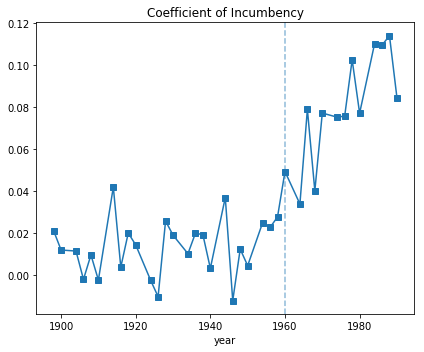

In [27]:
# inspect the fitted coefficient of Incumbency after year 1960
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ols_frame.set_index('year')['I'].plot(style='s-', title='Coefficient of Incumbency', ax=ax)
ax.axvline(1960, linestyle='--', alpha=0.5)
plt.tight_layout()

---
**4.2 Answer**
The coefficients of incumbency started to increase after year 1960.

---

### 4.3 Bootstrap a distribution for the coefficient of I for 1990-1988

**Plot a histogram of the distribution of the co-efficient. Also print the the 2.5th and 97.5th quantile of the distribution to give a non-parametric confidence interval, plotting these on the histogram. What conclusions can you draw?**

(Hint: Bootstrap involves sampling with replacement from the data and recalculating the quantity of interest, in our case the regression. This will give you a new coefficient for each regression. If you're interested in using the method for more complex applications it if imperative to familiarize with the assumptions, [this](http://stats.stackexchange.com/questions/26088/explaining-to-laypeople-why-bootstrapping-works) is a good start, but [this article](https://goo.gl/2T6k8j) is also helpful.)

In [28]:
np.random.seed(99)

# bootstrap data samples
fm = 'DP ~ DP1 + I + P'
nSim = 1000
sampleSize = pairframes['1990-1988'].shape[0]

I_coef_list = []
for i in range(nSim):
    sample_idx = np.random.choice(pairframes['1990-1988'].index.values, size=(sampleSize,), replace=True)
    sample_df = pairframes['1990-1988'].iloc[sample_idx]
    
    # fit OLS
    sample_df_ols = ols(fm, sample_df).fit()
    I_coef_list.append(sample_df_ols.params['I'])

I_coef_pct = np.percentile(I_coef_list, [2.5, 97.5])
print('The 95% confidence interval: [{}, {}] '.format(I_coef_pct[0], I_coef_pct[1]))

The 95% confidence interval: [0.05015926585810058, 0.1153782022427402] 


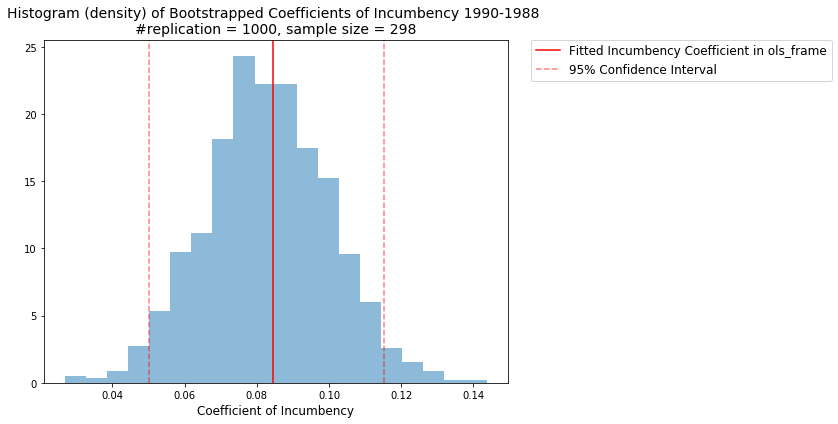

In [29]:
# plot the I's coefficients on bootstrapped samples
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(I_coef_list, density=True, bins=20, alpha=0.5)
ax.axvline(ols_frame.set_index('year').loc[1990]['I'], c='r',label='Fitted Incumbency Coefficient in ols_frame')
ax.axvline(I_coef_pct[0], c='r', linestyle='--', alpha=0.5)
ax.axvline(I_coef_pct[1], c='r', linestyle='--', alpha=0.5, label='95% Confidence Interval')
ax.set_title('Histogram (density) of Bootstrapped Coefficients of Incumbency 1990-1988 \n#replication = {}, sample size = {}'.format(nSim, sampleSize), fontsize=14)
ax.set_xlabel('Coefficient of Incumbency', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.tight_layout()

---
**4.3 Answer - Conclusions**

The coefficients of `Incumbency` on the 1000x bootstrapped samples have a confidence interval of $[0.05, 0.12]$, not containing zero, therefore suggesting `Incumbency` being a significant predictor.

---

### 4.4 Inference using p-values over time

Of-course, another more classic way of doing this same inference is though the regression itself -- it give us p-values. These are values from a t-test that asks if the coefficient is different from 0. The regression machinery assumes Normality of errors for this purpose. Lets assume the Normality and do an inference on all the years in our regression. The assumption used to calculate these p-values are: for each model (in our case `year`), the errors at each point of the regression are uncorrelated and follow a Normal distribution. We shall assume these to be true for now (in real life you ought to be checking a plot of residuals as well).

Generally we'd like the p-values to be vanishingly small as they *represent the probability that we observed such an extreme incumbency effect purely by chance*. Have a look at the Wikipedia page on [p-values](https://en.wikipedia.org/wiki/P-value) for a quick reminder.

Furthermore, when constructing results like this (where there are many tests considered at once) there are other concerns to take into account. One such concern is the issue of [multiple testing](https://en.wikipedia.org/wiki/Multiple_comparisons_problem). This is important because when we start dealing with a **large number** of hypotheses jointly the probability of making mistakes gets larger, hence we should be **more stringent** about what it means for a result to be significant. One such correction is the [**Bonferroni Correction**](https://en.wikipedia.org/wiki/Bonferroni_correction) which provides a new bound for deciding significance. Instead of asking the classic question: **is the p-value < $0.05$**?, this considers instead a stricter bound, we ask: **is p-value < $0.05/H$**. Where $H$ is the number of hypotheses being considered, in our case $H = 38$ (the number of years) -- this is a much higher bar for significance.

**Plot a graph of incumbency (`I`) coefficient p-values for every year. Use this plot to study if the coefficients after 1960 are significantly different from 0.** (Plot them in log scale for easier viewing of small numbers. Also draw lines at $\log(0.05)$ and $\log(0.05/38)$ for reference). **Interpret your results**.

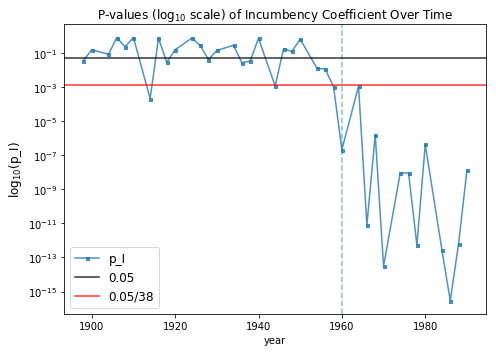

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ols_frame.set_index('year')['p_I'].plot(style='s-', logy=True, ax=ax, ms=3, alpha=0.8,
                                        title=r'P-values ($\log_{10}$ scale) of Incumbency Coefficient Over Time')
# ols_frame.plot(kind='scatter', x='year', y='p_I', logy=True, marker='s', ax=ax)
ax.axvline(1960, linestyle='--', alpha=0.5)
ax.axhline(0.05, c='k', linestyle='-', alpha=0.8, label='0.05')
ax.axhline(0.05/38, c='r', linestyle='-', alpha=0.8, label='0.05/38')
ax.set_ylabel(r'$\log_{10}$(p_I)', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()


---
**4.4 Answer - Conclusions**

It is observed that the p-values of Incumbency coefficients were below 0.05/38 after year 1960. This suggests that under comparisons with a total 38 hypotheses, `Incumbency` has become a significant predictor after 1960.

---

### 4.5 Carry out the linear regression with an interaction between the previous elections democratic fraction and this elections incumbency, for all the year pairs

**Is the regression complete? Or do we need more features?**

Recall that our model is fairly restrictive, the different incumbency groups are allowed to have different intercepts but the new candidate group, $I = 0$ is equally between the two incumbency groups. Furthermore, the incumbency groups are not allowed different slopes, meaning the effect of the previous elections Democratic fraction (`DP1`) is assumed the same for all incumbency groups. This may not be the case. 

In the figure below we can see that in fact the different groups seem to have not only different intercepts, but also possibly different slopes. 

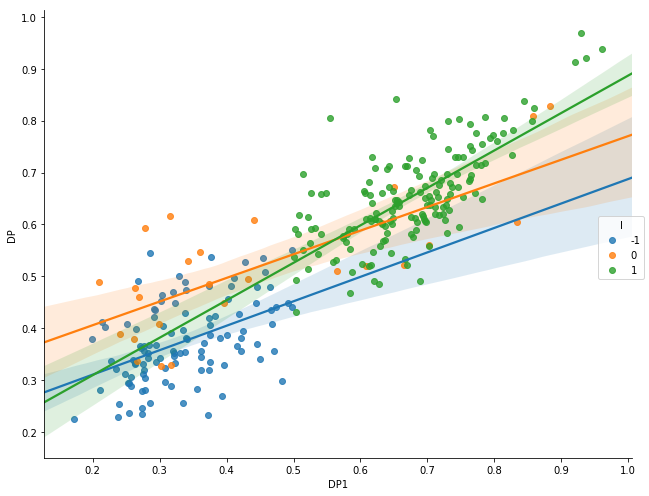

In [31]:
sns.lmplot(x="DP1", y="DP", hue = "I", data=pairframes['1990-1988'], size = 7, aspect=1.2)
plt.tight_layout()

**Carry out the regression with an between the previous elections democratic fraction and this elections incumbency, for each year pair. Is there evidence for interaction? How can you know for sure? **

(HINT: In mathematical notation this regression is:

$$d_{t,i} = \beta_4 d_{i, t-2} I_{i,t} + \beta_3 I_{i,t} + \beta_2 P_{i,t} + \beta_4 I_{i,t} d_{i, t-2} + \beta_0,$$

In `statsmodels` notation, we wish to carry out the regression:

`DP ~ DP1 + I + P + DP1:I` )


In [32]:
# regression with interaction terms
fm_int = 'DP ~ DP1 + I + P + DP1:I'
ols_int_result_dict_list = []
for yp_key, yp_df in pairframes.items():
    int_result_dict = {}
    
    # fit OLS
    yp_ols_int = ols(fm_int, yp_df).fit()
    
    # store OLS results
    int_result_dict['yp'] = yp_key
    int_result_dict['year'] = int(yp_key.split('-')[0])
    int_result_dict['formula'] = fm_int
    int_result_dict['R2'] = yp_ols_int.rsquared
    int_result_dict.update(yp_ols_int.params.to_dict()) # fitted intercept and coefficients 
    int_result_dict.update(yp_ols_int.pvalues.add_prefix('p_').to_dict()) # pvalues
    
    # append the old result dictionary to the list
    ols_int_result_dict_list.append(int_result_dict)

# convert the list of dictionaries to `ols_int_frame`
ols_int_frame = pd.DataFrame(ols_int_result_dict_list)
ols_int_frame = ols_int_frame[
    ['yp','year','formula','R2','Intercept','DP1','I','P','DP1:I','p_Intercept','p_DP1','p_I','p_P','p_DP1:I']
]
print(ols_int_frame.shape)
ols_int_frame.head()


(38, 14)


,yp,year,formula,R2,Intercept,DP1,I,P,DP1:I,p_Intercept,p_DP1,p_I,p_P,p_DP1:I
0,1898-1896,1898,DP ~ DP1 + I + P + DP1:I,0.721095,0.062006,0.939910,-0.041304,-0.014577,0.142585,6.246192e-02,2.636899e-34,0.156726,0.180435,0.023492
1,1900-1898,1900,DP ~ DP1 + I + P + DP1:I,0.820178,0.097581,0.765434,-0.006918,0.002967,0.036985,6.079301e-07,3.920054e-57,0.733069,0.706569,0.309648
2,1904-1902,1904,DP ~ DP1 + I + P + DP1:I,0.868971,0.002251,0.896128,-0.025120,0.002800,0.073879,9.072736e-01,1.655357e-69,0.186036,0.683325,0.041088
3,1906-1904,1906,DP ~ DP1 + I + P + DP1:I,0.857476,0.093900,0.881553,-0.023508,0.016063,0.046471,1.479223e-06,2.130199e-72,0.178058,0.047275,0.173509
4,1908-1906,1908,DP ~ DP1 + I + P + DP1:I,0.863833,0.103742,0.779571,0.012644,-0.003498,-0.006522,2.515951e-11,6.057820e-84,0.433447,0.677127,0.825486


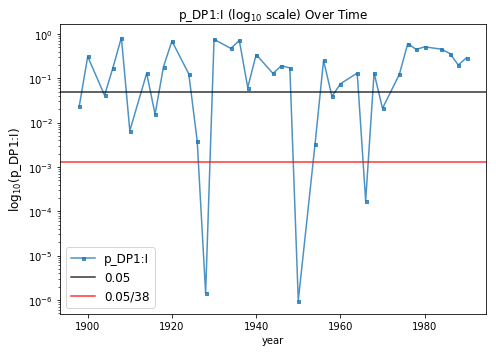

In [33]:
# plot p-values of the interaction term
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ols_int_frame.set_index('year')['p_DP1:I'].plot(style='s-', logy=True, ax=ax, ms=3, alpha=0.8,
                                                title=r'p_DP1:I ($\log_{10}$ scale) Over Time')

# ax.axvline(1960, linestyle='--', alpha=0.5)
ax.axhline(0.05, c='k', linestyle='-', alpha=0.8, label='0.05')
ax.axhline(0.05/38, c='r', linestyle='-', alpha=0.8, label='0.05/38')
ax.set_ylabel(r'$\log_{10}$(p_DP1:I)', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()


In [34]:
# print years where p_DP1:I < 0.05/38
ols_int_frame[ols_int_frame['p_DP1:I']<0.05/38][['yp', 'year', 'p_DP1:I']]

,yp,year,p_DP1:I
12,1928-1926,1928,1.425443e-06
21,1950-1948,1950,9.623747e-07
27,1966-1964,1966,1.715822e-04


In [35]:
# bootstrap a year where DP1:I is SIGNIFICANT
np.random.seed(99)

yp_sig = ols_int_frame[ols_int_frame['p_DP1:I']<0.05/38]['yp'].iloc[0]
nSim = 1000
sampleSize = pairframes[yp_sig].shape[0]

DP1xI_coef_list = []
for i in range(nSim):
    sample_idx = np.random.choice(pairframes[yp_sig].index.values, size=(sampleSize,), replace=True)
    sample_df = pairframes[yp_sig].iloc[sample_idx]
    
    # fit OLS
    sample_df_ols = ols(fm_int, sample_df).fit()
    DP1xI_coef_list.append(sample_df_ols.params['DP1:I'])

DP1xI_coef_pct = np.percentile(DP1xI_coef_list, [2.5, 97.5])
print('The 95% confidence interval during {}: [{}, {}] '.format(yp_sig, DP1xI_coef_pct[0], DP1xI_coef_pct[1]))

The 95% confidence interval during 1928-1926: [0.0945393307337304, 0.2584001729589221] 


In [36]:
# bootstrap a year where DP1:I is NOT SIGNIFICANT
np.random.seed(99)

yp_no_sig = ols_int_frame[ols_int_frame['p_DP1:I']>0.1]['yp'].iloc[0]
nSim = 1000
sampleSize = pairframes[yp_no_sig].shape[0]

DP1xI_coef_list = []
for i in range(nSim):
    sample_idx = np.random.choice(pairframes[yp_no_sig].index.values, size=(sampleSize,), replace=True)
    sample_df = pairframes[yp_no_sig].iloc[sample_idx]
    
    # fit OLS
    sample_df_ols = ols(fm_int, sample_df).fit()
    DP1xI_coef_list.append(sample_df_ols.params['DP1:I'])

DP1xI_coef_pct = np.percentile(DP1xI_coef_list, [2.5, 97.5])
print('The 95% confidence interval during {}: [{}, {}] '.format(yp_no_sig, DP1xI_coef_pct[0], DP1xI_coef_pct[1]))

The 95% confidence interval during 1900-1898: [-0.09161739278835825, 0.15939972848665207] 


---
**4.5 Answer - Evidence of the Interaction Term** 

> - **Evidence from p-values**

>> As shown above, only 3 years (***1928, 1950, 1966***) have `p_DP1:I` < 0.05/38. Therefore, only these 3 years but not the others have significant evidence for the interaction term `DP1:I`.

> - **Evidence from the confidence interval of coefficient estimates on the bootstrapped samples not containing zero**

>> Consistent with p-values < 0.05/38, the 95% Confidence Interval (CI) of `DP1:I`'s coefficient estimates on a 1000x non-parametric bootstrapping does not contain zero for the years: but does contain zeros for the others.

>> As ***an example year with significant evidence of `DP1:I`*** (`p_DP1:I` < 0.05/38), 1928-1926, the CI is $[0.09, 0.26]$, not containing 0 and thus suggesting that `DP1:I` is a significant predictor during this year pair.

>> Similarly, as ***an example year without significant evidence of `DP1:I`*** (`p_DP1:I` > 0.1), 1900-1898, the CI is $[-0.09, 0.16]$, containing 0 and thus suggesting that `DP1:I` is not significant during this year pair.

---